In [107]:
from collections import defaultdict, namedtuple
from functools import reduce

import requests
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import clear_output, display, Markdown

In [50]:
def print_md(txt="## testing"):
    display(Markdown(txt))

# Day 1: count chars in string

- `(` go up
- `)` go down

In [73]:
with open('2015_inputs/1.txt') as f:
    input_1 = f.read().strip()
    
input_1.count("(") - input_1.count(")")

138

## When do we get to the the basement at floor `-1`?

So lets track the position one move at a time:

## On floor  -1

Timesteps to reach the basement:  1771


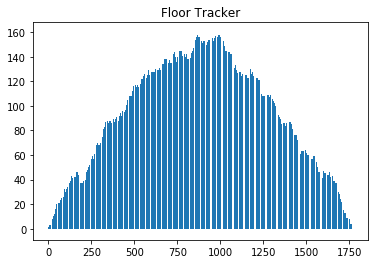

In [74]:
floor = 0
floors = []
for i, mv in enumerate(input_1):
    if mv == "(":
        floor += 1
    else:
        floor -= 1
    
    floors.append(floor)
    clear_output(True)
    print_md(f"## On floor {floor:3}")
    
    if floor == -1:
        print(f"Timesteps to reach the basement: ", i + 1)
        break

plt.title("Floor Tracker")
plt.bar([i for i in range(len(floors))], floors);

# Day 2: Calculate areas

The elves are running low on wrapping paper, and so they need to submit an order for more. They have a list of the dimensions (length l, width w, and height h) of each present, and only want to order exactly as much as they need.

Fortunately, every present is a box (a perfect right rectangular prism), which makes calculating the required wrapping paper for each gift a little easier: find the surface area of the box, which is `2*l*w + 2*w*h + 2*h*l`. The elves also need a little extra paper for each present: the area of the smallest side.

For example:

- A present with dimensions 2x3x4 requires 2*6 + 2*12 + 2*8 = 52 square feet of wrapping paper plus 6 square feet of slack, for a total of 58 square feet.
- A present with dimensions 1x1x10 requires 2*1 + 2*10 + 2*10 = 42 square feet of wrapping paper plus 1 square foot of slack, for a total of 43 square feet.
All numbers in the elves' list are in feet. 

How many total square feet of wrapping paper should they order?

In [80]:
with open('2015_inputs/2.txt') as f:
    input_2 = f.read().strip().split("\n")
input_2[:5]

['29x13x26', '11x11x14', '27x2x5', '6x10x13', '15x19x10']

First up, splitting it into a list of ints:

In [94]:
data2 = [[int(x) for x in i.split("x")] for i in input_2]
data2[:5]

[[29, 13, 26], [11, 11, 14], [27, 2, 5], [6, 10, 13], [15, 19, 10]]

In [113]:
def get_area(present):
    """returns the area of one present"""
    l, w, h = present
    return np.prod(sorted(present)[:2]) + 2*l*w + 2*w*h + 2*h*l

get_area([2,3,4]), get_area([1,1,10])

(58, 43)

Now to calculate the area of all presents:

In [114]:
present_areas = [get_area(x) for x in data2]
np.sum(present_areas)

1586300